# Data science exploration
## Featuring @FremdBot temperature data
* Reminder 1: What is a data scientist?
  * Video: https://www.youtube.com/watch?v=i2jwZcWicSY
  

* Reminder 2: What is Pandas?
  * Pandas is a popular tool that data scientists use to analyze data sets
  * It is a library designed to make it easier to work with large datasets
  * Pandas offers users 2 new data structures:
    * series
    * dataframes
    
    
* Background for today's data exploration:
  * @FremdBot is a Twitter account that tweets out temperature data from Fremd https://twitter.com/fremdbot
  * Made from two Raspberry Pi computers, two temperature probes, and a camera
  * The data collected by @FremdBot is publicly available here:
      * https://thingspeak.com/channels/123549
      * https://thingspeak.com/channels/142171
      * This is an example of "open data" (data that is freely shared with the world)
      * Further reading: https://en.wikipedia.org/wiki/Open_data
   * Related terms: 
     * The Internet of Things (https://en.wikipedia.org/wiki/Internet_of_things)
     * Citizen Science (https://en.wikipedia.org/wiki/Citizen_science)

## The @FremdBot project has generated a great deal of data
* We will use Pandas and some of the tools of datascience to dive into this data
* The data structure we will be using is a dataframe:

In [1]:
# Use pandas to read in the temperature data
import pandas as pd

# Reads in a csv file (comma separated values)
original_data = pd.read_csv("Outdoor_2019.csv")

# Show the last 3 entries in the file:
original_data[-3:]

,date_time,temp
24940,2017-09-16 17:05:42 UTC,87.6866
24941,2017-09-16 18:05:41 UTC,86.7866
24942,2017-09-16 19:05:42 UTC,87.3500


## Clean the data (remove erroneous temperatures)
* Cleaning data is the process of finding and deleting/fixing erroneous data
  * Further reading: https://en.wikipedia.org/wiki/Data_cleansing
  * In this example, the Raspberry Pi sometimes records an erroneous reading of 185 degrees F 


In [4]:
# Print length
print(len(original_data))

# Trim bad data
temp_data = original_data[original_data.temp<120]

# Print new length
print(len(temp_data))

24943
24935


## Look at all the temperatures (and sort from low to high)

In [6]:
# Sort the pandas dataframe by temperature
temp_data = temp_data.sort_values("temp")

# Print the first 10 items
temp_data[:10]

,date_time,temp
21283,2016-12-19 10:54:46 UTC,-9.2866
21278,2016-12-19 10:29:44 UTC,-9.2866
21279,2016-12-19 10:34:44 UTC,-9.2866
21292,2016-12-19 11:39:51 UTC,-9.2866
21293,2016-12-19 11:44:51 UTC,-9.2866
21280,2016-12-19 10:39:45 UTC,-9.2866
21286,2016-12-19 11:09:48 UTC,-9.1750
21291,2016-12-19 11:34:50 UTC,-9.1750
21295,2016-12-19 11:54:52 UTC,-9.1750
21284,2016-12-19 10:59:47 UTC,-9.1750


### Now create a single list (pandas series) of only temperatures 

In [8]:
# Create variable, store "temp" values
temps_only = temp_data["temp"]

# Print first ten items
temps_only[:10]

21283   -9.2866
21278   -9.2866
21279   -9.2866
21292   -9.2866
21293   -9.2866
21280   -9.2866
21286   -9.1750
21291   -9.1750
21295   -9.1750
21284   -9.1750
Name: temp, dtype: float64

## Find the average temperature
* The average annual temperature in the Chicagoland area is usually between 49.5F and 52.5F, so this number seems reasonable:

In [12]:
# Import numpy
import numpy as np

# Create list/array of temperatures
temp_array = np.array(temps_only)

# Calculate and print the average
average = np.average(temp_array)
print(average)


50.88674208141167


### Find all temperatures greater than 50

In [14]:
# Create variable, store only temps above 50
above_50 = temp_data[temps_only > 50]

# Print the first ten values
above_50[:10]

,date_time,temp
12728,2016-11-06 13:03:36 UTC,50.1116
17235,2016-11-29 00:50:21 UTC,50.1116
8789,2016-10-19 10:48:00 UTC,50.1116
17234,2016-11-29 00:45:21 UTC,50.1116
17233,2016-11-29 00:40:20 UTC,50.1116
17231,2016-11-29 00:30:20 UTC,50.1116
17232,2016-11-29 00:35:20 UTC,50.1116
9240,2016-10-21 00:27:17 UTC,50.1116
17228,2016-11-29 00:15:18 UTC,50.1116
8155,2016-10-13 12:57:30 UTC,50.1116


### Find all temperatures greater than 90

In [15]:
# Create variable, store only temps above 90
above_90 = temp_data[temps_only > 90]

# Print the first ten results
above_90[:10]

,date_time,temp
23839,2017-08-01 18:05:41 UTC,90.0500
37,2016-09-07 20:25:43 UTC,90.1616
45,2016-09-07 21:05:47 UTC,90.2750
41,2016-09-07 20:45:45 UTC,90.2750
40,2016-09-07 20:40:45 UTC,90.3866
38,2016-09-07 20:30:44 UTC,90.3866
39,2016-09-07 20:35:44 UTC,90.3866
23627,2017-07-23 21:05:41 UTC,90.5000
23864,2017-08-02 19:05:42 UTC,90.5000
23865,2017-08-02 20:05:41 UTC,90.6116


## Look at the 10 highest temperatures

In [16]:
# Create variable, store the last 10 temps
high_temps = above_90[-10:]

# Print the results
print(high_temps)

                     date_time     temp
23816  2017-07-31 19:05:41 UTC  91.5116
23625  2017-07-23 19:05:41 UTC  91.6250
23862  2017-08-02 17:05:41 UTC  91.9616
23528  2017-07-06 22:05:42 UTC  92.8616
23624  2017-07-23 18:05:42 UTC  93.3116
23523  2017-07-06 17:05:41 UTC  93.3116
23524  2017-07-06 18:05:42 UTC  93.5366
23527  2017-07-06 21:05:42 UTC  94.1000
23525  2017-07-06 19:05:42 UTC  95.0000
23526  2017-07-06 20:05:42 UTC  95.4500


### When did those high temperatures occur?

In [18]:
# Create a variable, store only dates
high_temp_dates = high_temps["date_time"]

# Print results
print(high_temp_dates)

23816    2017-07-31 19:05:41 UTC
23625    2017-07-23 19:05:41 UTC
23862    2017-08-02 17:05:41 UTC
23528    2017-07-06 22:05:42 UTC
23624    2017-07-23 18:05:42 UTC
23523    2017-07-06 17:05:41 UTC
23524    2017-07-06 18:05:42 UTC
23527    2017-07-06 21:05:42 UTC
23525    2017-07-06 19:05:42 UTC
23526    2017-07-06 20:05:42 UTC
Name: date_time, dtype: object


### Reformat the date and time of each entry 

In [19]:
# Import datetime
from datetime import datetime
new_dates = []
for date in temp_data["date_time"]:
    new_dates.append(datetime.strptime(date,'%Y-%m-%d %H:%M:%S UTC'))

print(new_dates[:10])

[datetime.datetime(2016, 12, 19, 10, 54, 46), datetime.datetime(2016, 12, 19, 10, 29, 44), datetime.datetime(2016, 12, 19, 10, 34, 44), datetime.datetime(2016, 12, 19, 11, 39, 51), datetime.datetime(2016, 12, 19, 11, 44, 51), datetime.datetime(2016, 12, 19, 10, 39, 45), datetime.datetime(2016, 12, 19, 11, 9, 48), datetime.datetime(2016, 12, 19, 11, 34, 50), datetime.datetime(2016, 12, 19, 11, 54, 52), datetime.datetime(2016, 12, 19, 10, 59, 47)]


### Now to graph the temperature data...

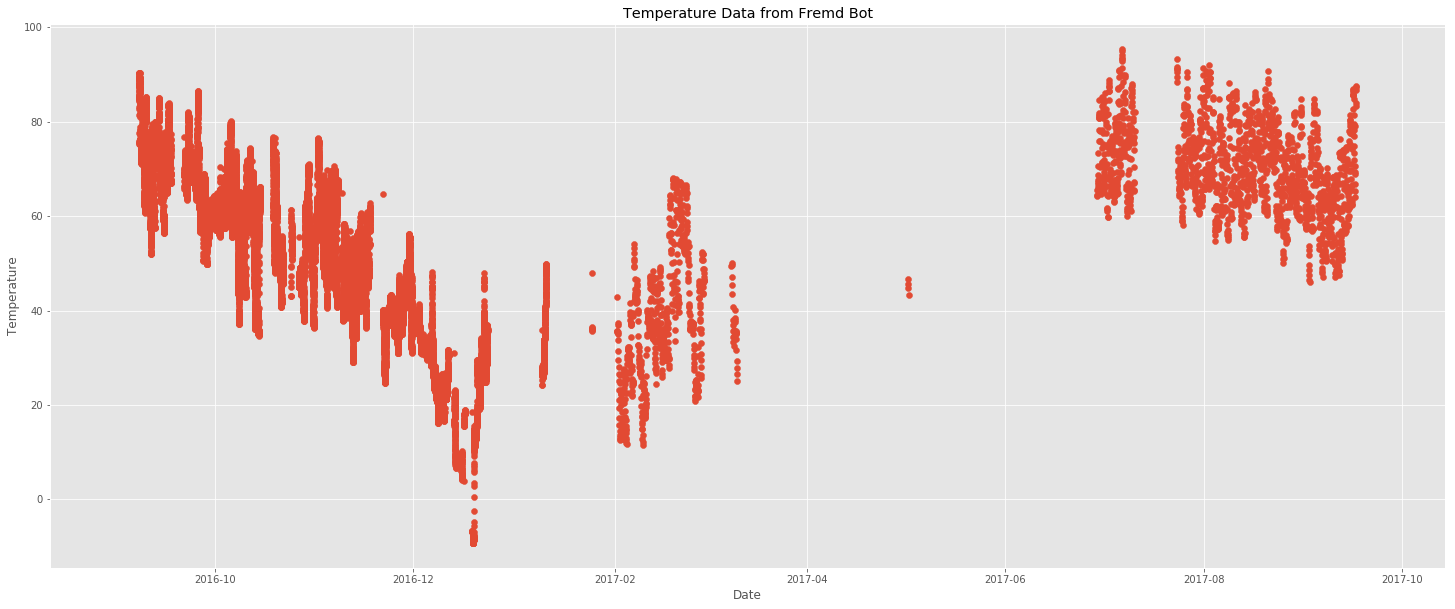

In [20]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Graph details
plot.figure(2,(25,10))
plot.style.use("ggplot")  # fivethirtyeight, bmh, grayscale, dark_background, ggplot
plot.title("Temperature Data from Fremd Bot")
plot.xlabel("Date")
plot.ylabel("Temperature")

# plot.scatter(x-axis data, y-axis data)
plot.scatter(new_dates,temp_data["temp"])
plot.show()

### Observations:
* Sometimes a good visualization can show us something that we don't notice in the full data set
  * What do you notice about this scatterplot that wasn't obvious in the original dataset?
  * Is this dataset complete?
  * What might have happened with the data?
    * Instructor note: Two main things happened to the data. Sometimes the .py script that recorded temperatures would crash
    and need to be rebooted. Othertimes the power to our raspberry pi device would be cut off :( Both of these scenarios would cause gaps in the data.
  * Should a dateset be disregarded or deleted because it is imperfect? 

## Try again with indoor temperatures (Room 223):

In [22]:
# Import pandas
import pandas as pd

# Read in the csv file (comma separated values)
indoor_orig = pd.read_csv('Room_223_2019.csv')

# Clean the data (remove entries over 120F)
indoor_clean = indoor_orig[indoor_orig.temp<120]

# Reformat the dates and times
from datetime import datetime
indoor_dates = []

for date in indoor_clean["date_time"]:
    indoor_dates.append(datetime.strptime(date,'%Y-%m-%d %H:%M:%S UTC'))

# Print first 10 results
print(indoor_dates[:10])

[datetime.datetime(2016, 8, 12, 22, 29, 30), datetime.datetime(2016, 8, 12, 22, 34, 31), datetime.datetime(2016, 8, 12, 22, 39, 31), datetime.datetime(2016, 8, 12, 22, 44, 31), datetime.datetime(2016, 8, 12, 22, 49, 32), datetime.datetime(2016, 8, 12, 22, 54, 32), datetime.datetime(2016, 8, 12, 22, 59, 33), datetime.datetime(2016, 8, 12, 23, 4, 33), datetime.datetime(2016, 8, 12, 23, 9, 33), datetime.datetime(2016, 8, 12, 23, 14, 34)]


### Plot:

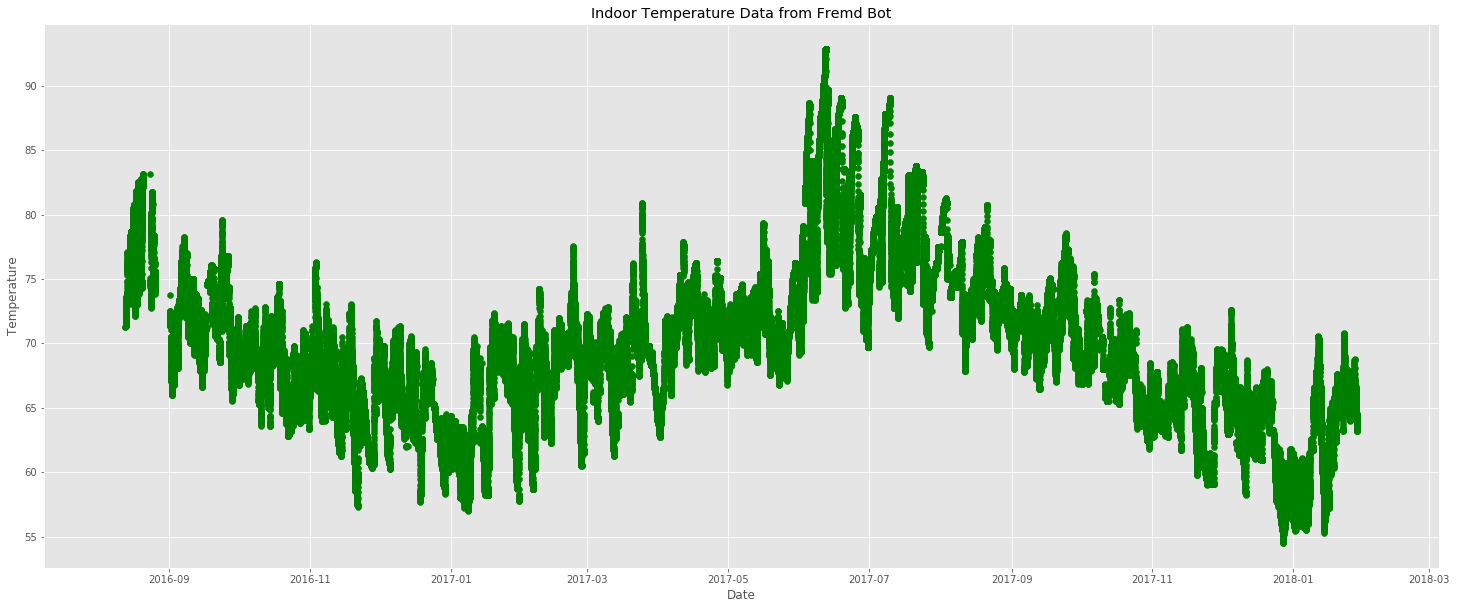

In [23]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Graph details
plot.figure(2,(25,10))
plot.style.use("ggplot")  # fivethirtyeight, bmh, grayscale, dark_background, ggplot
plot.title("Indoor Temperature Data from Fremd Bot")
plot.xlabel("Date")
plot.ylabel("Temperature")

#plot.scatter(x, y, s=area, c=colors, alpha=0.5)
plot.scatter(indoor_dates,indoor_clean["temp"],color="green")
plot.show()

# Task 1
* What do you notice about this scatterplot compared to the outdoor temperature scatterplot?

# Task 2
* Show the top 10 hottest temperatures recorded in Room 223
* What was the date and time of the hottest temperature recorded in Room 223?

# Task 3
* Show the 10 coldest temperatures recorded in Room 223
* What was the date and time of the coldest temperature recorded in Room 223?

# Task 4
* What was the average temperature in Room 223 based on the provided dataset?

# Challenge
* Use the outdoor temperature data to determine the date and magnitude of the largest 24-hour temperature swing
  * For example, suppose that it was 50 degrees F on 1/5/17 at 5:00pm and -10 degrees F on 1/6/17 at 3:00am
  * If this were the case, then this would be a 24-hour temperature swing of -60 degrees 